In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from adjustText import adjust_text
%matplotlib inline

C:\Users\zhangyang01\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
# data = w.wset("sectorconstituent","sectorid=a39901011i000000;field=wind_code,sec_name") ## 申万三级行业
# data = w.wset("sectorconstituent","sectorid=a39901011h000000;field=wind_code,sec_name") ## 申万二级行业
data = w.wset("sectorconstituent","sectorid=a39901011g000000;field=wind_code,sec_name") ## 申万一级行业

In [4]:
df = pd.DataFrame(data.Data, index=data.Fields)
df = df.T

In [5]:
data = w.wsd(df['wind_code'].tolist(), 'close', '2010-01-01', '2020-06-01', 'Period=M')

In [6]:
prices = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
prices = prices.T

In [7]:
X = prices.pct_change().dropna().values.T

In [8]:
model = AgglomerativeClustering(n_clusters=6)

In [9]:
df['cluster'] = model.fit_predict(X)

In [10]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.xaxis.set_tick_params(labelsize=15)
    ax.yaxis.set_tick_params(labelsize=15)
    dendrogram(linkage_matrix, **kwargs)
    _ = ax.set_title(u'申万一级行业收益率时间序列聚类', fontsize=25)
#     fig.savefig('../data/底层资产聚类.png', format='png', dpi=400, bbox_inches='tight')

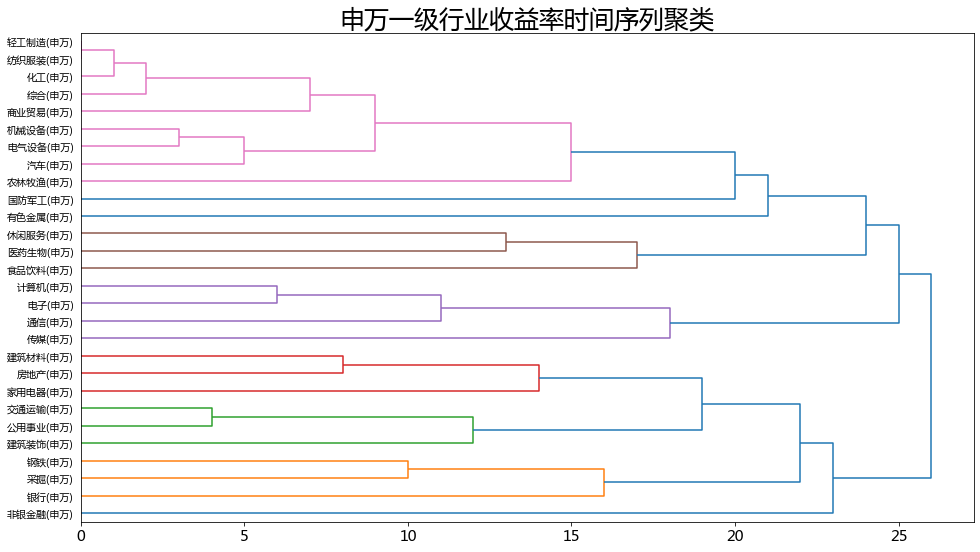

In [11]:
plot_dendrogram(model, labels=df['sec_name'].tolist(), orientation='right')

In [12]:
data = w.wset("sectorconstituent","sectorid=a39901011h000000;field=wind_code,sec_name") ## 申万二级行业

In [13]:
df = pd.DataFrame(data.Data, index=data.Fields)
df = df.T

In [14]:
data = w.wsd(df['wind_code'].tolist(), 'close', '2010-01-01', '2020-06-01', 'Period=M')

In [15]:
prices = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
prices = prices.T

In [16]:
X = prices.pct_change().dropna().values.T

In [17]:
model = AgglomerativeClustering(n_clusters=6)

In [18]:
df['cluster'] = model.fit_predict(X)

In [19]:
data = w.wss(df['wind_code'].tolist(), "risk_returnyearly_index,stdevry","startDate=20100101;endDate=20200706;returnType=1;period=2")

In [20]:
ret_vol = pd.DataFrame(data.Data, index=['ret', 'vol'])
ret_vol = ret_vol.T

In [21]:
df = pd.concat([df, ret_vol], axis=1)

In [22]:
df[df['cluster'] == 0]

,wind_code,sec_name,cluster,ret,vol
8,801021.SI,煤炭开采Ⅱ(申万),0,-9.621725,30.417443
9,801022.SI,其他采掘Ⅱ(申万),0,-10.954894,35.233980
10,801023.SI,石油开采Ⅱ(申万),0,-11.173384,22.416215
11,801024.SI,采掘服务Ⅱ(申万),0,-6.962882,32.041558
15,801035.SI,石油化工(申万),0,-7.675318,24.725992
18,801041.SI,钢铁Ⅱ(申万),0,-5.734722,26.042197
19,801051.SI,金属非金属新材料(申万),0,5.119724,34.447004
20,801053.SI,黄金Ⅱ(申万),0,-2.100752,32.123224
21,801054.SI,稀有金属(申万),0,2.414522,37.141488
27,801076.SI,运输设备Ⅱ(申万),0,0.308869,36.459462


In [23]:
df = df.dropna()

In [24]:
df.index = np.arange(df.shape[0])

KeyboardInterrupt: 

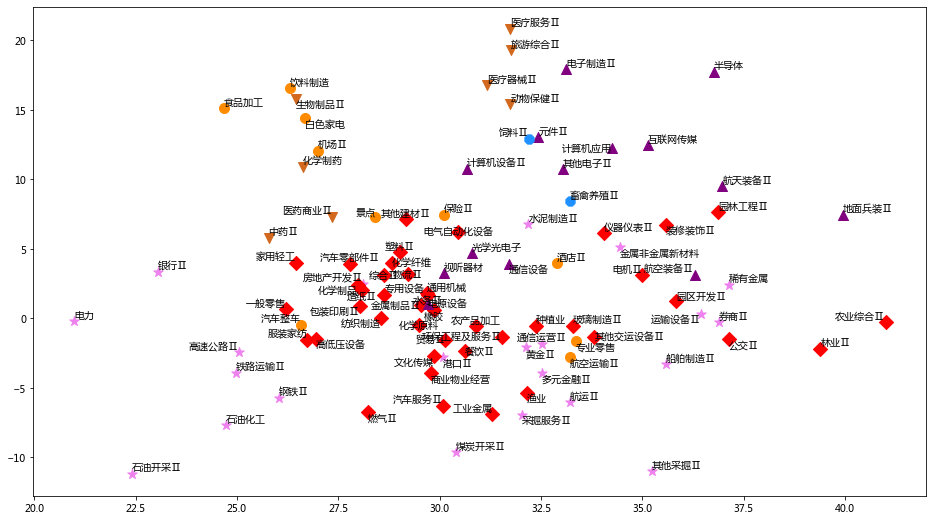

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(df[df['cluster'] == 0]['vol'], df[df['cluster'] == 0]['ret'], color='violet', s=100, marker='*')
ax.scatter(df[df['cluster'] == 1]['vol'], df[df['cluster'] == 1]['ret'], color='red', s=100, marker='D')
ax.scatter(df[df['cluster'] == 2]['vol'], df[df['cluster'] == 2]['ret'], color='purple', s=100, marker='^')
ax.scatter(df[df['cluster'] == 3]['vol'], df[df['cluster'] == 3]['ret'], color='chocolate', s=100, marker='v')
ax.scatter(df[df['cluster'] == 4]['vol'], df[df['cluster'] == 4]['ret'], color='dodgerblue', s=100, marker='8')
ax.scatter(df[df['cluster'] == 5]['vol'], df[df['cluster'] == 5]['ret'], color='darkorange', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(df['vol'][i], df['ret'][i], df['sec_name'][i].rstrip('(申万)'), fontsize=10) for i in range(df.shape[0])]
adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title(u'申万二级行业风险收益特征', fontsize=25, y=1)

In [26]:
data = w.wsd(df['wind_code'].tolist(), 'qfa_roe', '2010-01-01', '2020-04-01', 'Period=Q')

In [27]:
roe = pd.DataFrame(data.Data, index=data.Codes, columns=data.Times)
roe = roe.T

In [28]:
roe = roe.dropna()

In [29]:
roe_ttm = roe.rolling(4).apply(lambda x: ((1+x/100).cumprod()[-1]-1)*100)

In [30]:
roe_df = pd.DataFrame({'roe_mean': roe_ttm.mean(), 'roe_std': roe_ttm.std()})

In [31]:
roe_df.head()

,roe_mean,roe_std
801011.SI,1.327855,1.591513
801012.SI,0.441009,4.465264
801013.SI,4.035758,5.629398
801014.SI,14.584783,4.095126
801015.SI,-2.115737,6.849399


In [32]:
roe_df['wind_code'] = roe_df.index

In [33]:
roe_df = roe_df.merge(df, on=['wind_code'])

In [34]:
roe_df.head()

,roe_mean,roe_std,wind_code,sec_name,cluster,ret,vol
0,1.327855,1.591513,801011.SI,林业Ⅱ(申万),4,-2.197715,39.395235
1,0.441009,4.465264,801012.SI,农产品加工(申万),4,-0.567673,30.899061
2,4.035758,5.629398,801013.SI,农业综合Ⅱ(申万),4,-0.252788,41.003084
3,14.584783,4.095126,801014.SI,饲料Ⅱ(申万),3,12.939226,32.218288
4,-2.115737,6.849399,801015.SI,渔业(申万),4,-5.375491,32.165106


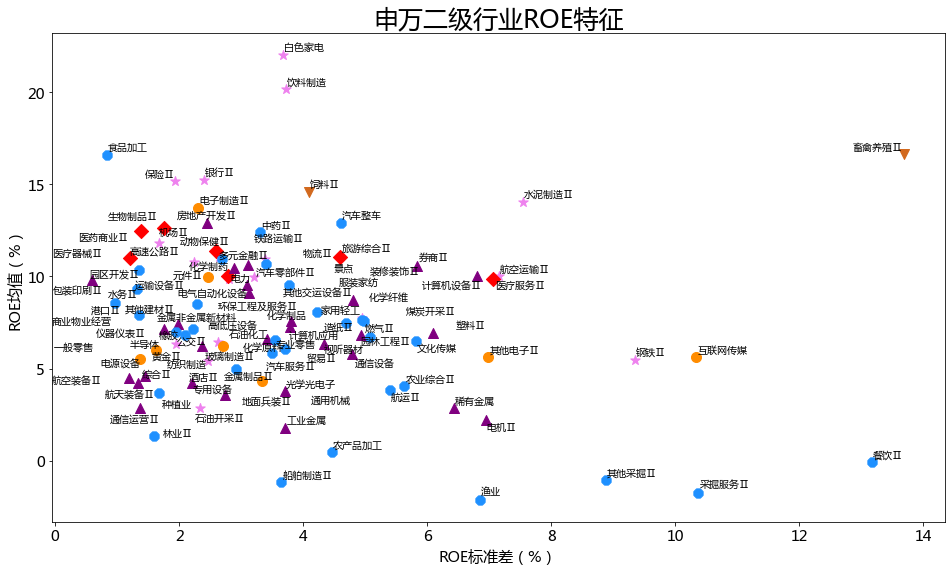

In [35]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(roe_df[roe_df['cluster'] == 0]['roe_std'], roe_df[roe_df['cluster'] == 0]['roe_mean'], color='violet', s=100, marker='*')
ax.scatter(roe_df[roe_df['cluster'] == 1]['roe_std'], roe_df[roe_df['cluster'] == 1]['roe_mean'], color='red', s=100, marker='D')
ax.scatter(roe_df[roe_df['cluster'] == 2]['roe_std'], roe_df[roe_df['cluster'] == 2]['roe_mean'], color='purple', s=100, marker='^')
ax.scatter(roe_df[roe_df['cluster'] == 3]['roe_std'], roe_df[roe_df['cluster'] == 3]['roe_mean'], color='chocolate', s=100, marker='v')
ax.scatter(roe_df[roe_df['cluster'] == 4]['roe_std'], roe_df[roe_df['cluster'] == 4]['roe_mean'], color='dodgerblue', s=100, marker='8')
ax.scatter(roe_df[roe_df['cluster'] == 5]['roe_std'], roe_df[roe_df['cluster'] == 5]['roe_mean'], color='darkorange', s=100)

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
texts = [ax.text(roe_df['roe_std'][i], roe_df['roe_mean'][i], roe_df['sec_name'][i].rstrip('(申万)'), fontsize=10) for i in range(df.shape[0])]
adjust_text(texts)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('ROE均值（%）', fontsize=15)
ax.set_xlabel('ROE标准差（%）', fontsize=15)
_ = ax.set_title(u'申万二级行业ROE特征', fontsize=25, y=1)

# 申万三级行业波动率与收益率分布

In [26]:
DATA_DIR = 'D:\OneDrive\嘉实\资产配置'
filename = '%s/申万行业分类表.xlsx'%(DATA_DIR)

In [27]:
df = pd.read_excel(filename, sheet_name='申万三级行业')

In [28]:
industry = pd.read_excel(filename, sheet_name='申万三级行业市值', skiprows=4)

In [29]:
data = w.wss(industry['Wind代码'].tolist(), "risk_returnyearly_index,stdevry","startDate=20100101;endDate=20200706;returnType=1;period=2")

In [30]:
industry['ret'] = data.Data[0]
industry['vol'] = data.Data[1]

In [31]:
industry

,最新调整日期,Wind代码,证券名称,总市值（亿）,ret,vol
0,2020-07-31,850111.SI,种子生产(申万),669.917879,6.022356,35.052652
1,2020-07-31,850112.SI,粮食种植(申万),581.513481,-1.600629,40.866309
2,2020-07-31,850113.SI,其他种植业(申万),383.006903,-6.633381,36.369087
3,2020-07-31,850121.SI,海洋捕捞(申万),41.830502,-3.470672,34.617909
4,2020-07-31,850122.SI,水产养殖(申万),172.430435,-5.852567,33.313934
...,...,...,...,...,...,...
222,2020-07-31,857344.SI,线缆部件及其他(申万),1552.222605,2.869671,30.363711
223,2020-07-31,857411.SI,航天装备Ⅲ(申万),2781.998321,9.492653,36.980293
224,2020-07-31,857421.SI,航空装备Ⅲ(申万),6697.529055,3.019864,36.279355
225,2020-07-31,857431.SI,地面兵装Ⅲ(申万),2021.208473,7.423600,39.945284


In [32]:
industry['type'] = np.NaN
for i, name in enumerate(industry['证券名称']):
    name = name.rstrip('(申万)')
    if name in df['大消费'].tolist():
        print(name)
        industry.loc[i, 'type'] = '消费'
    elif name in df['大科技'].tolist():
        industry.loc[i, 'type'] = '科技'
    else:
        industry.loc[i, 'type'] = '其他'

饲料Ⅲ
畜禽养殖Ⅲ
动物保健Ⅲ
日用化学产品
其他建材Ⅲ
乘用车
汽车零部件Ⅲ
冰箱
空调
洗衣机
小家电
家电零部件
彩电
其它视听器材
白酒
啤酒
其他酒类
软饮料
葡萄酒
黄酒
肉制品
调味发酵品
乳品
食品综合
家具
其他家用轻工
中药Ⅲ
医药商业Ⅲ
医疗服务Ⅲ
百货
超市
多业态零售
专业连锁
酒店Ⅲ
旅游综合Ⅲ
餐饮Ⅲ
其他休闲服务Ⅲ
装修装饰Ⅲ


In [37]:
industry[industry['type'] == '消费']

,最新调整日期,Wind代码,证券名称,总市值（亿）,ret,vol,type
6,2020-07-31,850141.SI,饲料Ⅲ(申万),3923.464559,12.935408,32.218178,消费
11,2020-07-31,850171.SI,畜禽养殖Ⅲ(申万),4916.582149,8.425846,33.214482,消费
12,2020-07-31,850181.SI,动物保健Ⅲ(申万),853.769190,15.425301,31.749705,消费
28,2020-07-31,850334.SI,日用化学产品(申万),1286.909611,7.517072,28.355792,消费
65,2020-07-31,850614.SI,其他建材Ⅲ(申万),3692.608041,8.555156,29.611088,消费
98,2020-07-31,850911.SI,乘用车(申万),11083.277349,0.029247,27.752052,消费
101,2020-07-31,850921.SI,汽车零部件Ⅲ(申万),12355.060102,3.969667,27.786045,消费
109,2020-07-31,851111.SI,冰箱(申万),2157.298278,8.655362,31.090282,消费
110,2020-07-31,851112.SI,空调(申万),10312.778546,18.172623,30.192871,消费
111,2020-07-31,851113.SI,洗衣机(申万),50.814906,7.230359,34.732952,消费


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


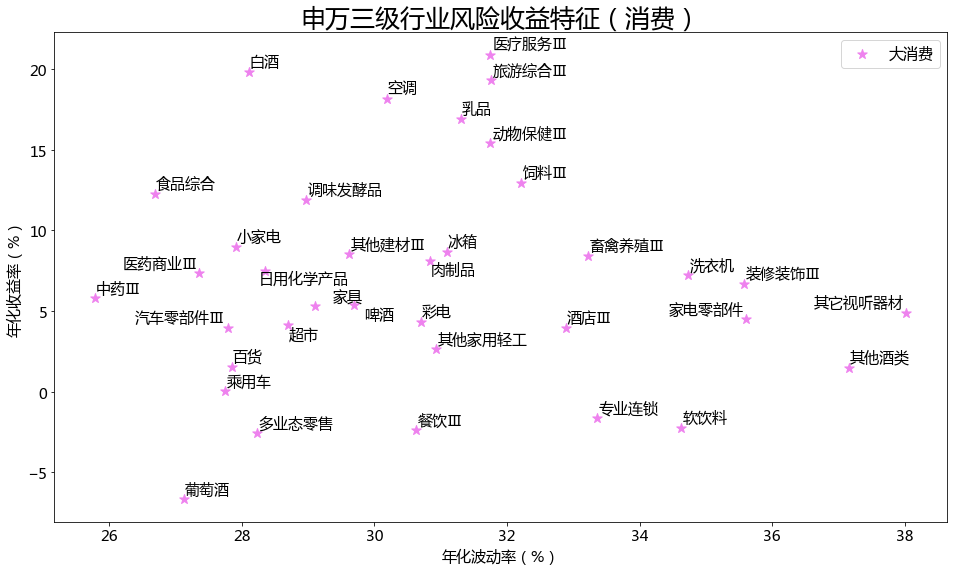

In [40]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(industry[industry['type'] == '消费']['vol'], industry[industry['type'] == '消费']['ret'], color='violet', s=100, marker='*', label='大消费')
# ax.scatter(industry[industry['type'] == '科技']['vol'], industry[industry['type'] == '科技']['ret'], color='red', s=100, marker='D', label='大科技')
# ax.scatter(industry[industry['type'] == '其他']['vol'], industry[industry['type'] == '其他']['ret'], color='blue', s=50, marker='o', label='其他')

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
# texts = [ax.text(roe_df['roe_std'][i], roe_df['roe_mean'][i], roe_df['sec_name'][i].rstrip('(申万)'), fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

texts = [ax.text(industry['vol'][i], industry['ret'][i], industry['证券名称'][i].rstrip('(申万)'), fontsize=15) \
         for i in industry[industry['type'] == '消费'].index]
adjust_text(texts)

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title(u'申万三级行业风险收益特征（消费）', fontsize=25, y=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


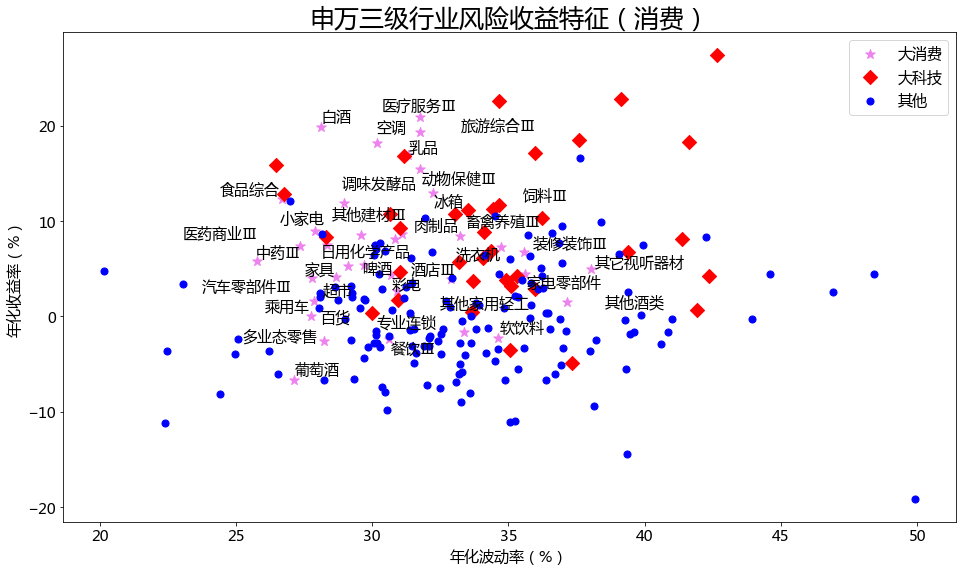

In [131]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(industry[industry['type'] == '消费']['vol'], industry[industry['type'] == '消费']['ret'], color='violet', s=100, marker='*', label='大消费')
ax.scatter(industry[industry['type'] == '科技']['vol'], industry[industry['type'] == '科技']['ret'], color='red', s=100, marker='D', label='大科技')
ax.scatter(industry[industry['type'] == '其他']['vol'], industry[industry['type'] == '其他']['ret'], color='blue', s=50, marker='o', label='其他')

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
# texts = [ax.text(roe_df['roe_std'][i], roe_df['roe_mean'][i], roe_df['sec_name'][i].rstrip('(申万)'), fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

texts = [ax.text(industry['vol'][i], industry['ret'][i], industry['证券名称'][i].rstrip('(申万)'), fontsize=15) \
         for i in industry[industry['type'] == '科技'].index]
adjust_text(texts)

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title(u'申万三级行业风险收益特征（科技）', fontsize=25, y=1)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


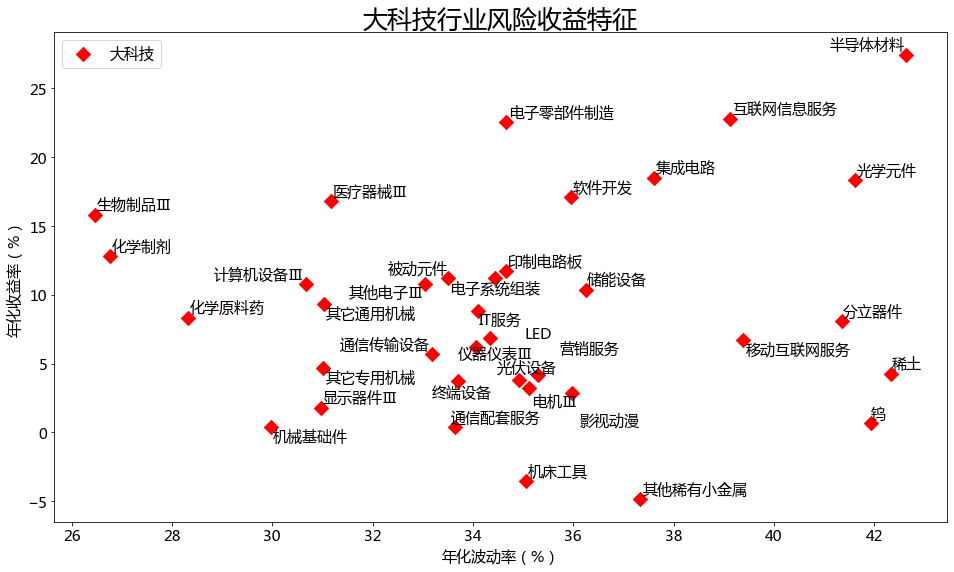

In [137]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.scatter(industry[industry['type'] == '消费']['vol'], industry[industry['type'] == '消费']['ret'], color='violet', s=100, marker='*', label='大消费')
ax.scatter(industry[industry['type'] == '科技']['vol'], industry[industry['type'] == '科技']['ret'], color='red', s=100, marker='D', label='大科技')
# ax.scatter(industry[industry['type'] == '其他']['vol'], industry[industry['type'] == '其他']['ret'], color='blue', s=50, marker='o', label='其他')

# for i, txt in enumerate(df['sec_name']):
#     ax.annotate(txt.rstrip('(申万)'), (df['vol'][i], df['ret'][i]), fontsize=10)
# texts = [ax.text(roe_df['roe_std'][i], roe_df['roe_mean'][i], roe_df['sec_name'][i].rstrip('(申万)'), fontsize=10) for i in range(df.shape[0])]
# adjust_text(texts)

texts = [ax.text(industry['vol'][i], industry['ret'][i], industry['证券名称'][i].rstrip('(申万)'), fontsize=15) for i in industry[industry['type'] == '科技'].index]
adjust_text(texts)

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel('年化收益率（%）', fontsize=15)
ax.set_xlabel('年化波动率（%）', fontsize=15)
_ = ax.set_title(u'大科技行业风险收益特征', fontsize=25, y=1)